# L5: MarketBasket购物篮词云分析

In [75]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from lxml import etree
from nltk.tokenize import word_tokenize

#数据加载
data=pd.read_csv('./Market_Basket_Optimisation.csv',header=None)
data.head()
#data.shape

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#将数据存放到Transaction中
transactions = []
#存储字典，key:value
item_count = {}
for i in range(data.shape[0]):
    temp = []
    for j in range(data.shape[1]):
        item=str(data.values[i,j])
        if item!='nan':
            temp.append(item)
            if item not in item_count:
                item_count[item] = 1
            else:
                item_count[item]+=1
    transactions.append(temp)
transactions
#item_count

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

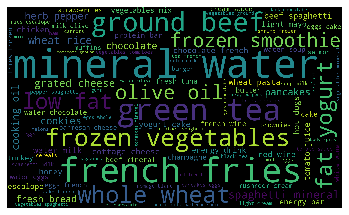

In [3]:
# 去掉停用词
def remove_stop_words(f):
    stop_words = []
    for stop_word in stop_words:
        f = f.replace(stop_word, '')
    return f

# 生成词云
def create_word_cloud(f):
    f = remove_stop_words(f)
    cut_text = word_tokenize(f)
    #print(cut_text)
    cut_text = " ".join(cut_text)
    wc = WordCloud(
        max_words=100,
        width=2000,
        height=1200,
    )
    wordcloud = wc.generate(cut_text)
    # 写词云图片
    wordcloud.to_file("wordcloud.jpg")
    # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
# 生成词云
all_word = ''.join('%s'%item for item in transactions)
#print(all_word)
create_word_cloud(all_word)

In [4]:
#显示top10的商品, 对商品进行分类汇总
Top10 = sorted(item_count.items(), key=lambda x:x[1],reverse=True)
Top10[:10]

[('mineral water', 1788),
 ('eggs', 1348),
 ('spaghetti', 1306),
 ('french fries', 1282),
 ('chocolate', 1230),
 ('green tea', 991),
 ('milk', 972),
 ('ground beef', 737),
 ('frozen vegetables', 715),
 ('pancakes', 713)]

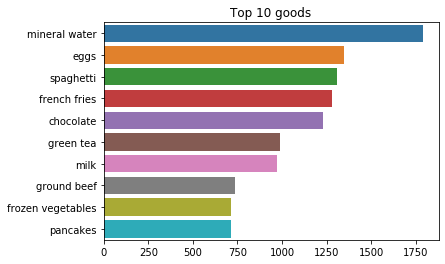

In [14]:
import seaborn as sns
#对Top10 商品进行可视化
y=['mineral water','eggs','spaghetti','french fries','chocolate','green tea', 'milk','ground beef', 'frozen vegetables',
 'pancakes']
x=[1788,1348,1306,1282,1230,991,972,737,715,713]
sns.barplot(x,y)
plt.title("Top 10 goods")
plt.show()

In [82]:
df=pd.DataFrame(Top10[:10],columns=['goods','sales'])
df.info

<bound method DataFrame.info of                goods  sales
0      mineral water   1788
1               eggs   1348
2          spaghetti   1306
3       french fries   1282
4          chocolate   1230
5          green tea    991
6               milk    972
7        ground beef    737
8  frozen vegetables    715
9           pancakes    713>

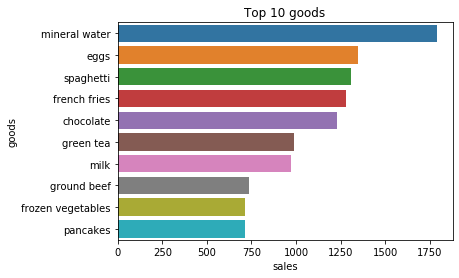

In [73]:
df.sort_values('sales',ascending=False, inplace=True)
sns.barplot(df.sales,df.goods)
plt.title("Top 10 goods")
plt.show()

结论：购物篮TOP10商品为： 矿泉水，鸡蛋，菠菜等同日常生产相关物品，分析结论可靠，贴近生活实际